## Loading libraries and datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

cars_data = pd.read_csv("cars_sampled.csv")

## Setting Dimensions for plots

In [2]:
sns.set(rc = {'figure.figsize':(11.7, 8.27)})

In [3]:
cars_data.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18


In [4]:
cars_data_copy = cars_data.copy()

In [5]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
dateCrawled            50001 non-null object
name                   50001 non-null object
seller                 50001 non-null object
offerType              50001 non-null object
price                  50001 non-null int64
abtest                 50001 non-null object
vehicleType            44813 non-null object
yearOfRegistration     50001 non-null int64
gearbox                47177 non-null object
powerPS                50001 non-null int64
model                  47243 non-null object
kilometer              50001 non-null int64
monthOfRegistration    50001 non-null int64
fuelType               45498 non-null object
brand                  50001 non-null object
notRepairedDamage      40285 non-null object
dateCreated            50001 non-null object
postalCode             50001 non-null int64
lastSeen               50001 non-null object
dtypes: int64(6), object(13)
memory usage:

In [6]:
cars_data.isnull().sum()

dateCrawled               0
name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5188
yearOfRegistration        0
gearbox                2824
powerPS                   0
model                  2758
kilometer                 0
monthOfRegistration       0
fuelType               4503
brand                     0
notRepairedDamage      9716
dateCreated               0
postalCode                0
lastSeen                  0
dtype: int64

In [7]:
cars_data.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000
mean,6.559865e+03,2005.544229,116.496130,125613.687726,5.743725,50775.216696
std,8.581847e+04,122.991832,230.567709,40205.234483,3.711345,25743.701933
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1.150000e+03,1999.000000,69.000000,125000.000000,3.000000,30559.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49504.000000
75%,7.190000e+03,2008.000000,150.000000,150000.000000,9.000000,71404.000000
max,1.234568e+07,9999.000000,19312.000000,150000.000000,12.000000,99998.000000


In [8]:
cars_data.describe(include = "O")

,dateCrawled,name,seller,offerType,abtest,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage,dateCreated,lastSeen
count,50001,50001,50001,50001,50001,44813,47177,47243,45498,50001,40285,50001,50001
unique,12039,38766,2,2,2,8,2,248,7,40,2,75,10413
top,3/4/2016 16:57,BMW_318i,private,offer,test,limousine,manual,golf,petrol,volkswagen,no,3/4/2016 0:00,6/4/2016 5:46
freq,15,90,49999,49998,25869,13041,36732,3972,30214,10646,35337,1976,107


## Dropping unwanted columns

In [9]:
col = ['name', 'dateCrawled', 'dateCreated', 'postalCode', 'lastSeen']
cars_data = cars_data.drop(columns = col, axis = 1)

In [10]:
cars_data.head()

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN
1,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no
2,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN
3,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no
4,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no


In [11]:
cars_data.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5188
yearOfRegistration        0
gearbox                2824
powerPS                   0
model                  2758
kilometer                 0
monthOfRegistration       0
fuelType               4503
brand                     0
notRepairedDamage      9716
dtype: int64

In [12]:
cars_data.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000
mean,6.559865e+03,2005.544229,116.496130,125613.687726,5.743725
std,8.581847e+04,122.991832,230.567709,40205.234483,3.711345
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000
25%,1.150000e+03,1999.000000,69.000000,125000.000000,3.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000
75%,7.190000e+03,2008.000000,150.000000,150000.000000,9.000000
max,1.234568e+07,9999.000000,19312.000000,150000.000000,12.000000


## Drop duplicates

In [13]:
cars_data.drop_duplicates(keep='first', inplace=True)

## Cleaning Data

In [14]:
cars_data.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64

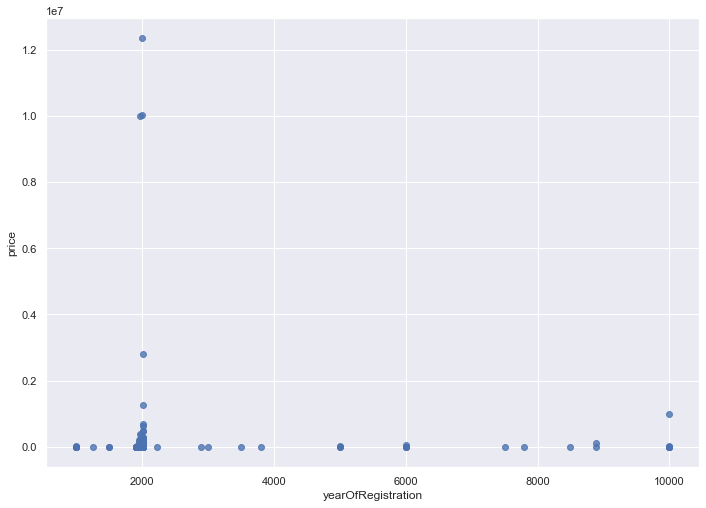

In [15]:
sns.regplot(x='yearOfRegistration', y='price', scatter = True, fit_reg=False, data = cars_data)

In [16]:
pd.set_option('display.float.format', lambda x: '%.3f' % x)

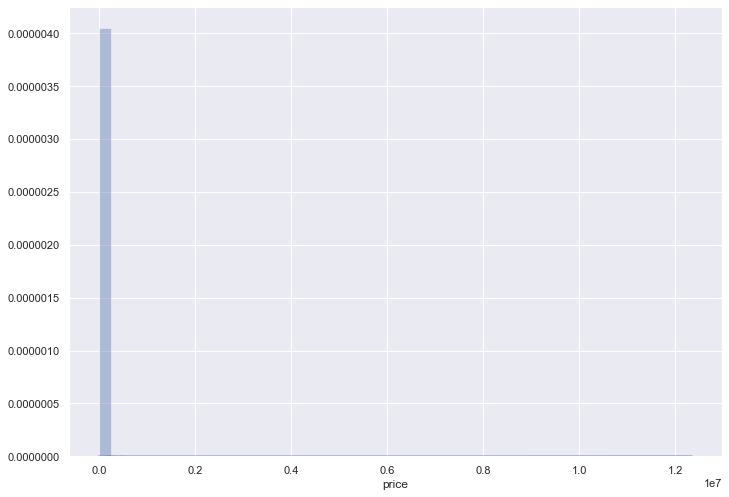

In [17]:
sns.distplot(cars_data['price'])

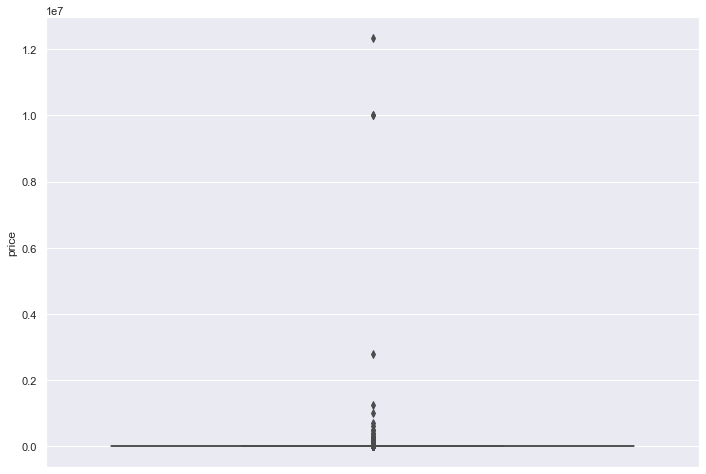

In [18]:
sns.boxplot(y = cars_data['price'])

In [19]:
cars_data['price'].describe()

count      49531.000
mean        6567.220
std        86222.378
min            0.000
25%         1150.000
50%         2950.000
75%         7100.000
max     12345678.000
Name: price, dtype: float64

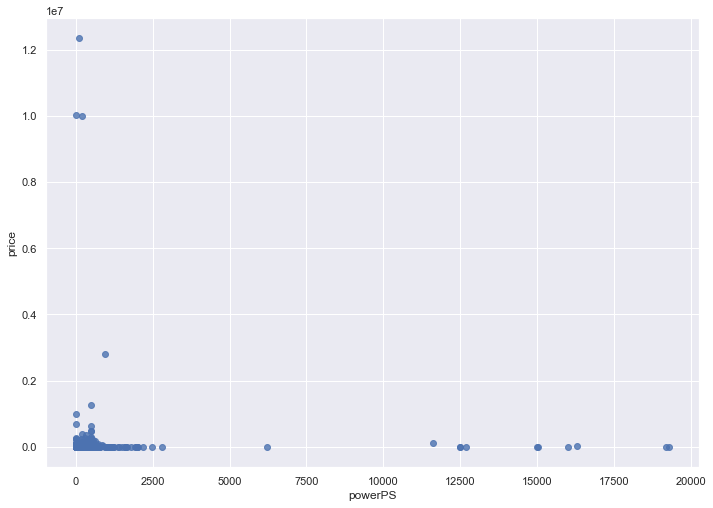

In [20]:
sns.regplot(x='powerPS', y='price', scatter = True, fit_reg=False, data = cars_data)

## Working Range of data

In [21]:
cars_data = cars_data[
    (cars_data.yearOfRegistration <=2018)
    & (cars_data.yearOfRegistration >= 1950)
    & (cars_data.price >= 100)
    & (cars_data.price <= 150000)
    & (cars_data.powerPS >= 10)
    & (cars_data.powerPS <= 500)
]

In [22]:
cars_data

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN
1,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no
2,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN
3,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no
4,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no
5,private,offer,988,test,limousine,1995,manual,90,passat,150000,2,petrol,volkswagen,no
7,private,offer,1399,test,coupe,1997,manual,136,clk,150000,11,petrol,mercedes_benz,no
8,private,offer,4680,test,station wagon,2005,manual,122,vectra,150000,12,petrol,opel,no
9,private,offer,8340,test,limousine,2005,automatic,140,octavia,125000,4,diesel,skoda,no
10,private,offer,1870,control,limousine,2001,manual,82,a_klasse,150000,1,petrol,mercedes_benz,no


In [23]:
cars_data.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            2876
yearOfRegistration        0
gearbox                 794
powerPS                   0
model                  1683
kilometer                 0
monthOfRegistration       0
fuelType               2597
brand                     0
notRepairedDamage      6277
dtype: int64

In [24]:
cars_data['vehicleType'].value_counts()

limousine        11746
small car         9285
station wagon     8076
bus               3597
cabrio            2792
coupe             2261
suv               1813
others             326
Name: vehicleType, dtype: int64

In [25]:
cars_data['monthOfRegistration']/=12

In [26]:
cars_data['Age'] = (2018-cars_data['yearOfRegistration'])+cars_data['monthOfRegistration']
cars_data['Age'] = round(cars_data['Age'], 2)
cars_data['Age'].describe()

count   42772.000
mean       14.873
std         7.093
min         0.000
25%        10.330
50%        14.830
75%        19.170
max        67.750
Name: Age, dtype: float64

In [27]:
cars_data.head()

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,Age
0,private,offer,4450,test,limousine,2003,manual,150,3er,150000,0.250,diesel,bmw,NaN,15.250
1,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,0.500,diesel,volvo,no,13.500
2,private,offer,3200,test,bus,2003,manual,101,touran,150000,0.917,diesel,volkswagen,NaN,15.920
3,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,1.000,petrol,seat,no,13.000
4,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,0.917,diesel,volvo,no,10.920


In [28]:
cars_data = cars_data.drop(columns= ['yearOfRegistration', 'monthOfRegistration'], axis = 1)

In [29]:
cars_data.head()

,seller,offerType,price,abtest,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,Age
0,private,offer,4450,test,limousine,manual,150,3er,150000,diesel,bmw,NaN,15.250
1,private,offer,13299,control,suv,manual,163,xc_reihe,150000,diesel,volvo,no,13.500
2,private,offer,3200,test,bus,manual,101,touran,150000,diesel,volkswagen,NaN,15.920
3,private,offer,4500,control,small car,manual,86,ibiza,60000,petrol,seat,no,13.000
4,private,offer,18750,test,suv,automatic,185,xc_reihe,150000,diesel,volvo,no,10.920


### Age

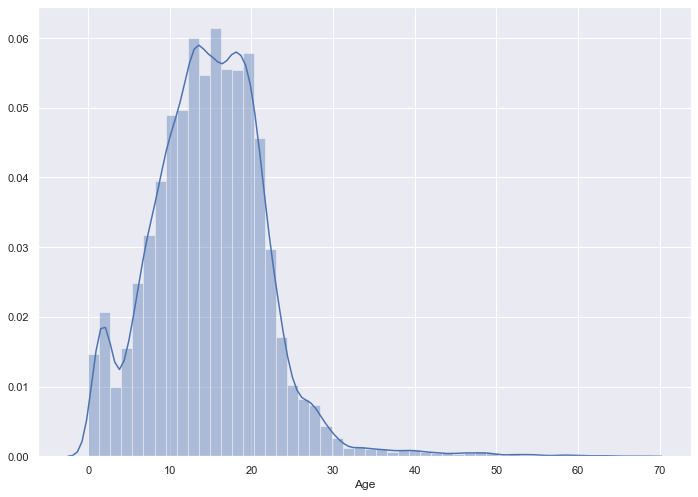

In [30]:
sns.distplot(cars_data['Age'])

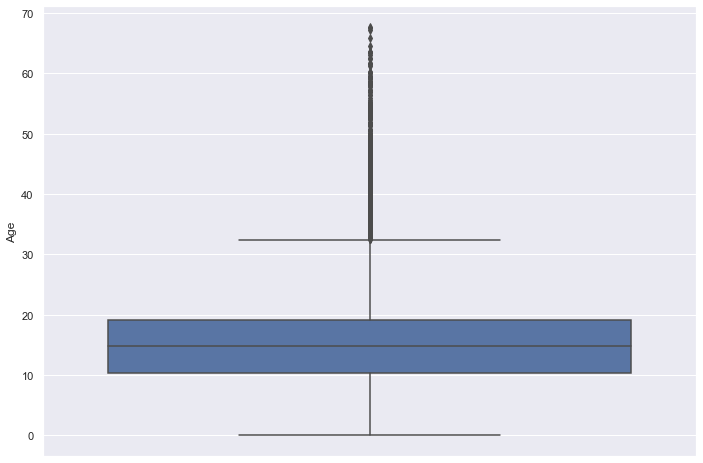

In [31]:
sns.boxplot(y = cars_data['Age'])

### Price

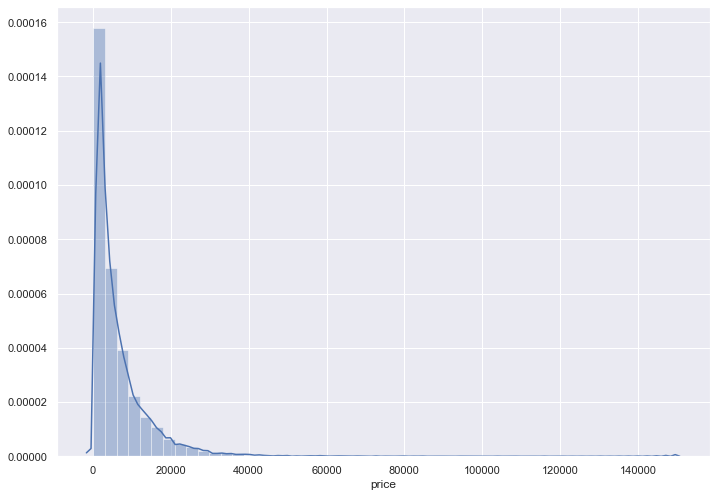

In [32]:
sns.distplot(cars_data['price'])

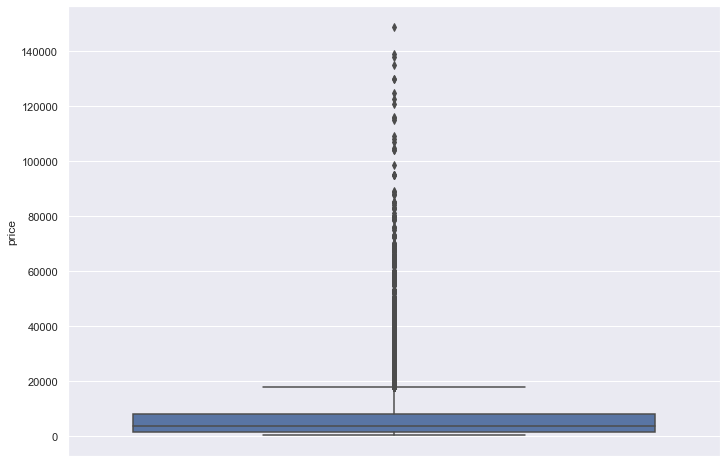

In [33]:
sns.boxplot(y = cars_data['price'])

### powerPS

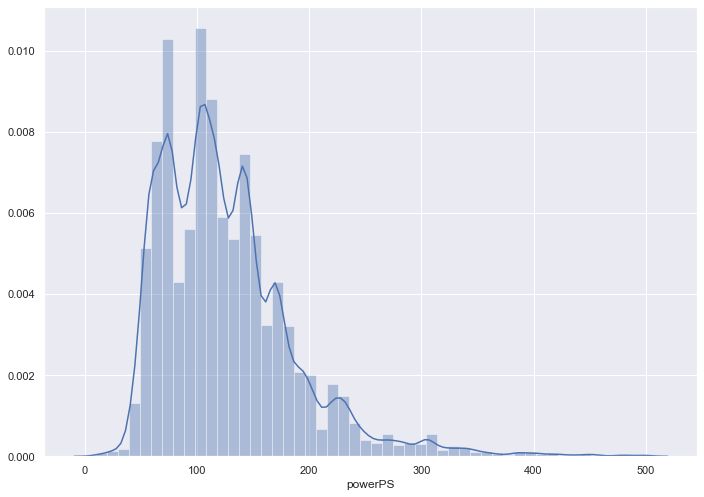

In [34]:
sns.distplot(cars_data['powerPS'])

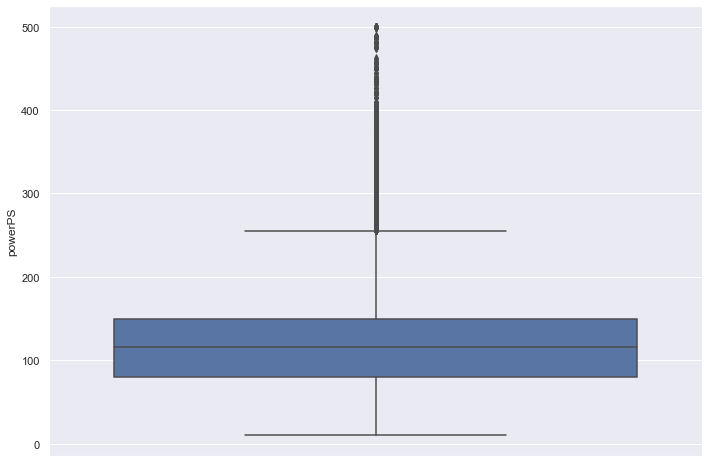

In [35]:
sns.boxplot(y = cars_data['powerPS'])

## Price vs Age

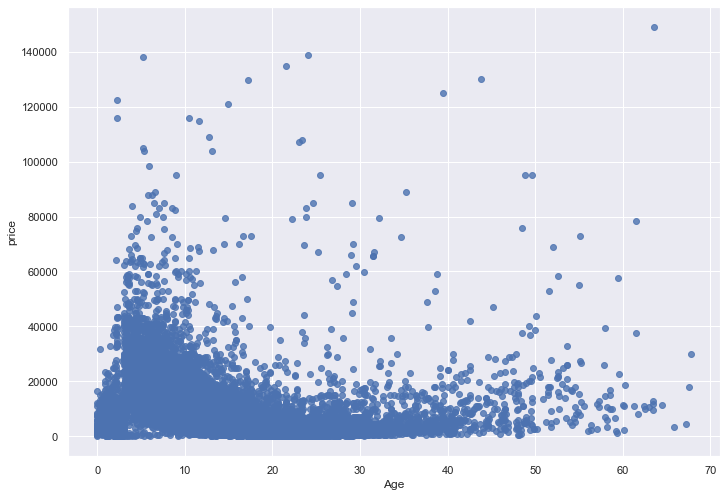

In [36]:
sns.regplot(x = 'Age', y = 'price', data = cars_data, scatter = True, fit_reg= False)

## Price vs powerPS

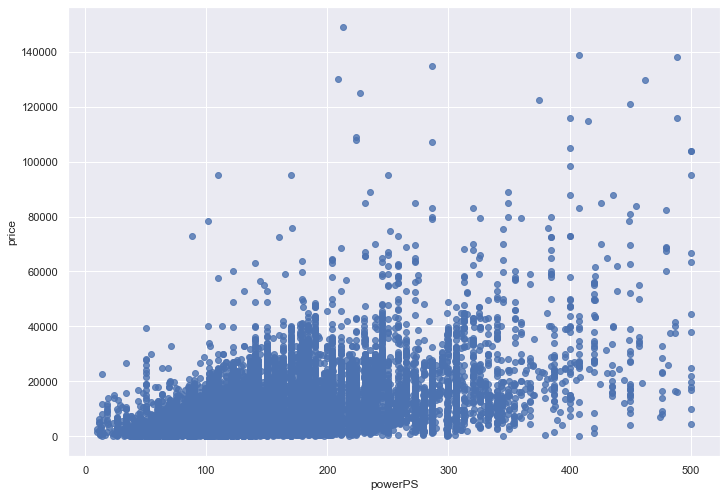

In [37]:
sns.regplot(x = 'powerPS', y = 'price', data = cars_data, scatter = True, fit_reg= False)

In [38]:
cars_data['seller'].value_counts()

private       42771
commercial        1
Name: seller, dtype: int64

In [39]:
cars_data['offerType'].value_counts()

offer    42772
Name: offerType, dtype: int64

### offerType and Seller are insignificant 

In [40]:
cars_data['abtest'].value_counts()

test       22128
control    20644
Name: abtest, dtype: int64

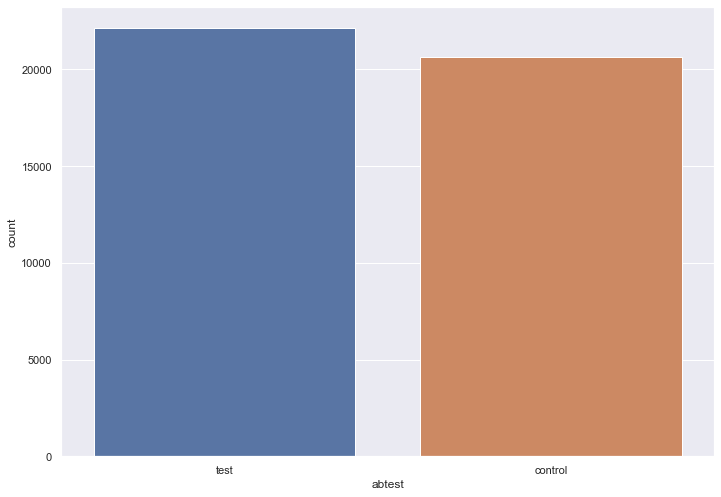

In [41]:
sns.countplot(x = 'abtest', data = cars_data)

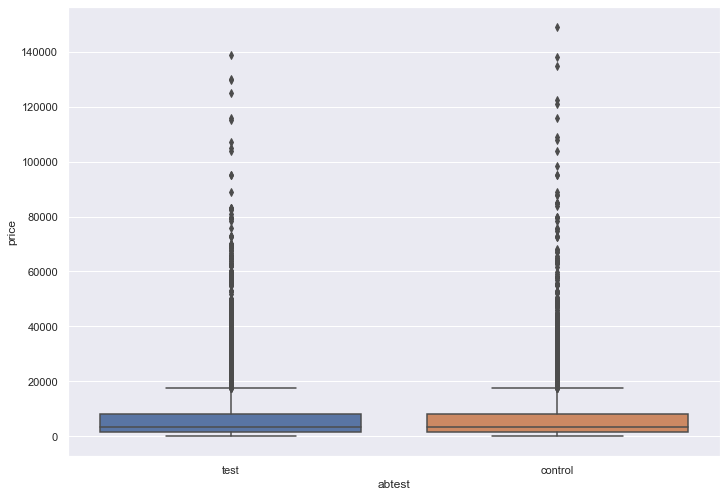

In [42]:
sns.boxplot(x = 'abtest', y = 'price', data = cars_data)

### abtest is insignificant

In [43]:
cars_data['vehicleType'].value_counts()

limousine        11746
small car         9285
station wagon     8076
bus               3597
cabrio            2792
coupe             2261
suv               1813
others             326
Name: vehicleType, dtype: int64

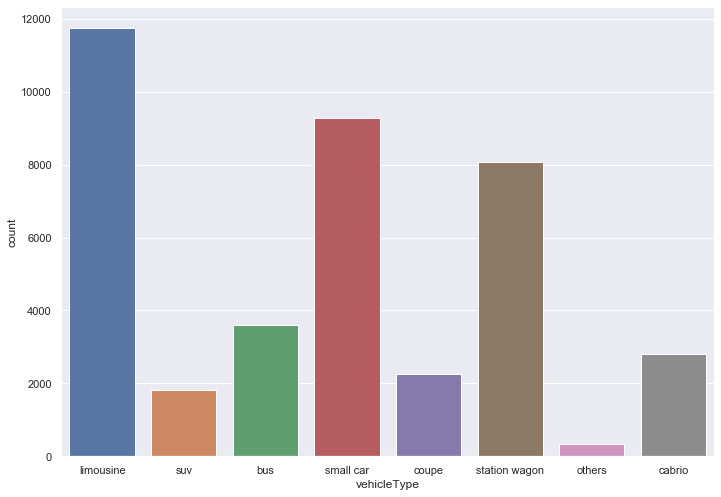

In [44]:
sns.countplot(x = 'vehicleType', data= cars_data)

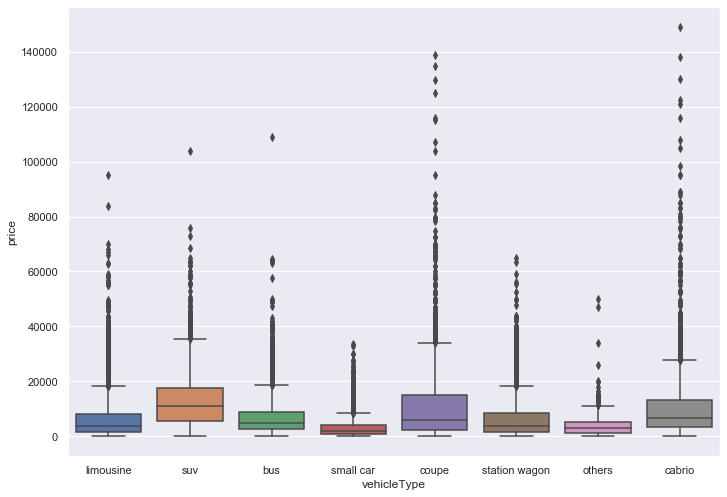

In [45]:
sns.boxplot(x = 'vehicleType', y = 'price', data = cars_data)

In [46]:
cars_data['gearbox'].value_counts()

manual       32582
automatic     9396
Name: gearbox, dtype: int64

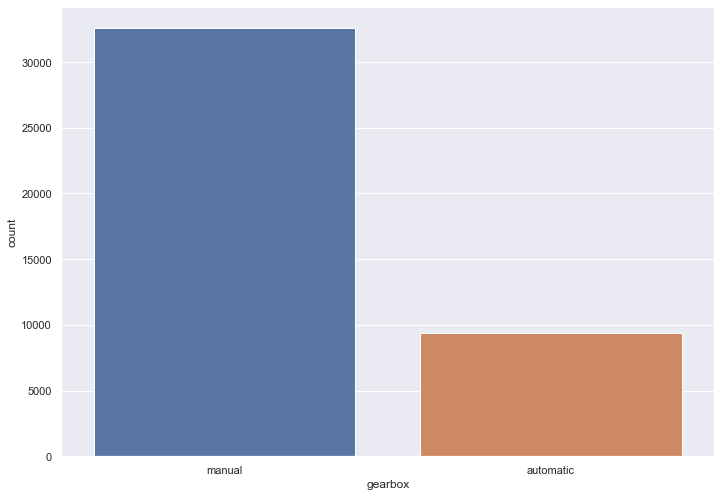

In [47]:
sns.countplot(x = 'gearbox', data= cars_data)

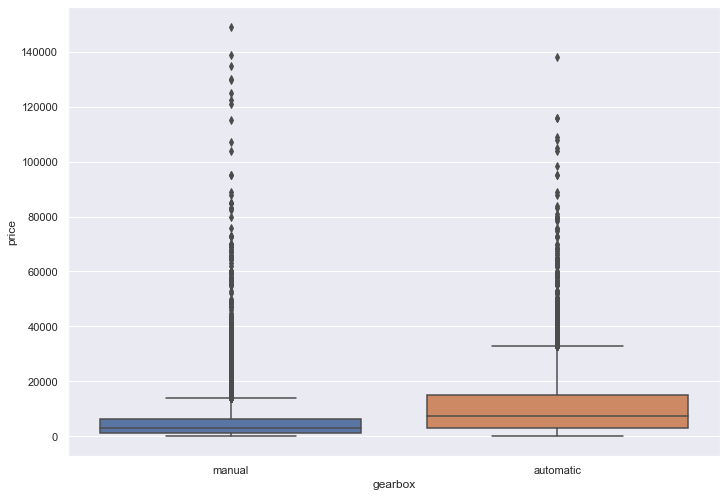

In [48]:
sns.boxplot(x = 'gearbox', y = 'price', data = cars_data)

In [49]:
cars_data['model'].value_counts()

golf                  3478
others                2900
3er                   2482
polo                  1500
corsa                 1386
astra                 1276
a4                    1230
passat                1200
c_klasse              1042
5er                   1013
e_klasse               907
a3                     826
a6                     737
focus                  701
fiesta                 637
transporter            630
2_reihe                603
fortwo                 532
1er                    527
a_klasse               497
vectra                 491
twingo                 479
clio                   437
3_reihe                437
touran                 422
mondeo                 388
punto                  363
ibiza                  354
megane                 340
zafira                 325
                      ... 
lanos                   10
v60                     10
nubira                   9
900                      9
range_rover              8
r19                      8
c

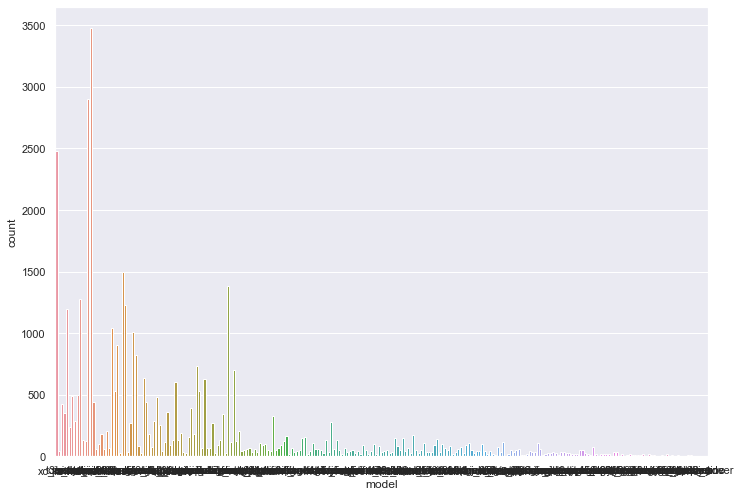

In [50]:
sns.countplot(x = 'model', data= cars_data)

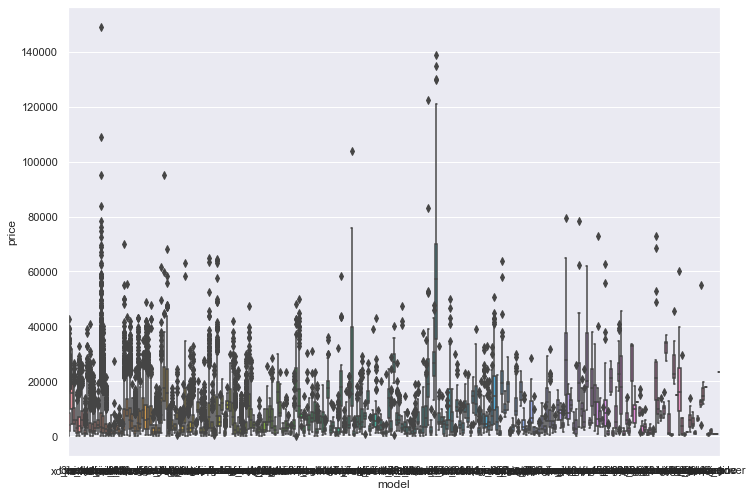

In [51]:
sns.boxplot(x = 'model', y = 'price', data = cars_data)

### Model is significant

In [52]:
cars_data['kilometer'].value_counts().sort_index()

5000        479
10000       207
20000       651
30000       712
40000       795
50000       932
60000      1101
70000      1182
80000      1378
90000      1484
100000     1824
125000     4597
150000    27430
Name: kilometer, dtype: int64

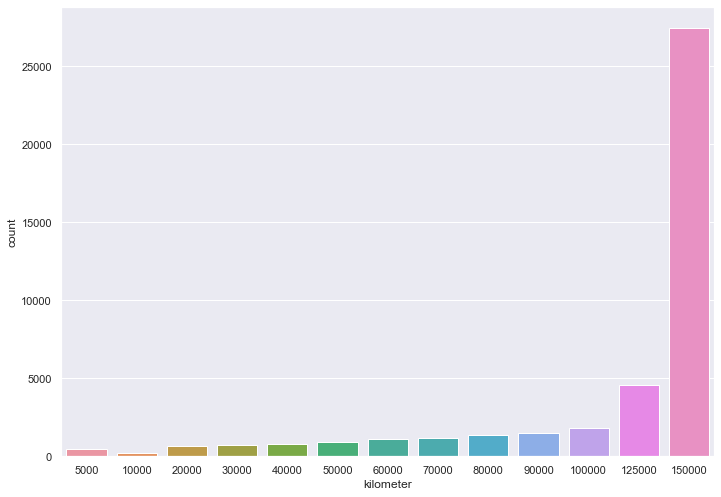

In [53]:
sns.countplot(x = 'kilometer', data= cars_data)

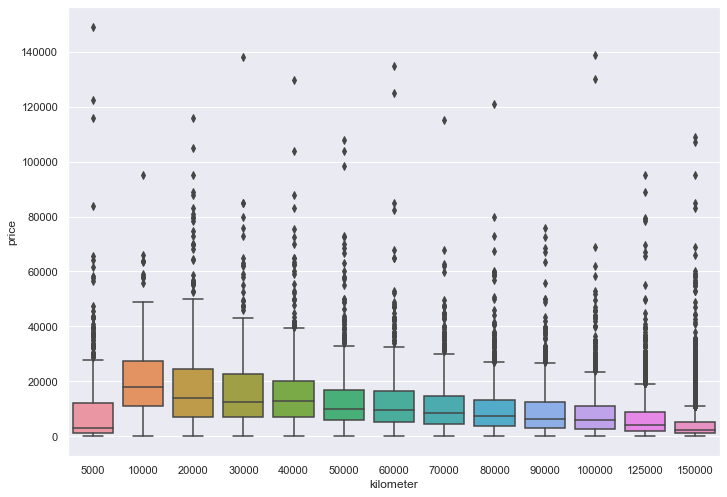

In [54]:
sns.boxplot(x = 'kilometer', y = 'price', data = cars_data)

### Kilometer is significant

In [55]:
cars_data['fuelType'].value_counts()

petrol     26509
diesel     12854
lpg          690
cng           70
hybrid        36
electro       10
other          6
Name: fuelType, dtype: int64

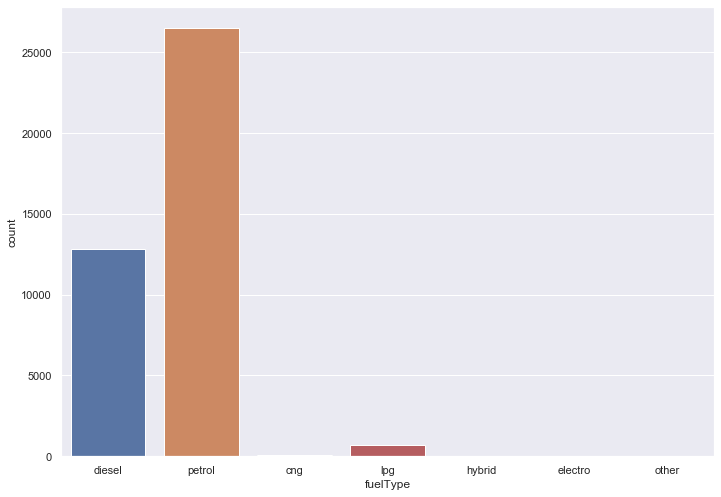

In [56]:
sns.countplot(x = 'fuelType', data= cars_data)

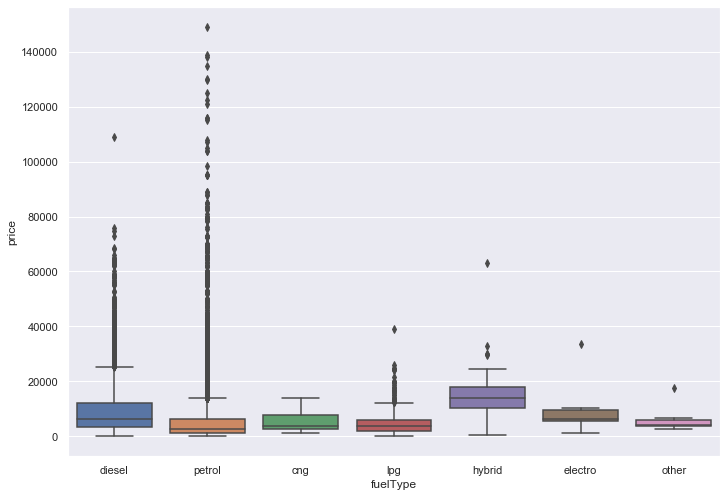

In [57]:
sns.boxplot(x = 'fuelType', y = 'price', data = cars_data)

### FuelType is significant

In [58]:
cars_data['brand'].value_counts()

volkswagen        9134
bmw               4868
opel              4487
mercedes_benz     4134
audi              3984
ford              2815
renault           1941
peugeot           1323
fiat               996
seat               886
skoda              698
mazda              663
smart              623
nissan             601
citroen            598
toyota             547
volvo              429
mini               428
hyundai            406
mitsubishi         359
honda              300
sonstige_autos     299
kia                276
suzuki             264
porsche            260
alfa_romeo         245
chevrolet          213
chrysler           151
dacia              123
subaru             112
jeep                91
land_rover          81
jaguar              78
daihatsu            67
saab                65
lancia              56
daewoo              53
rover               53
trabant             43
lada                22
Name: brand, dtype: int64

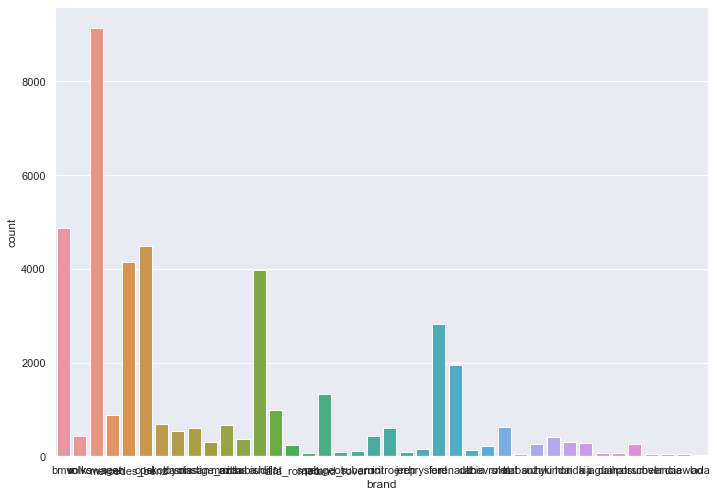

In [59]:
sns.countplot(x = 'brand', data= cars_data)

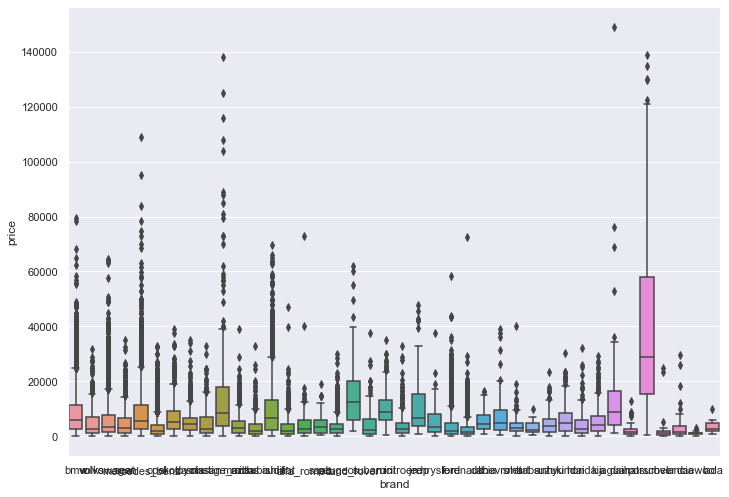

In [60]:
sns.boxplot(x = 'brand', y = 'price', data = cars_data)

### Brand is significant

In [61]:
cars_data['notRepairedDamage'].value_counts()

no     32507
yes     3988
Name: notRepairedDamage, dtype: int64

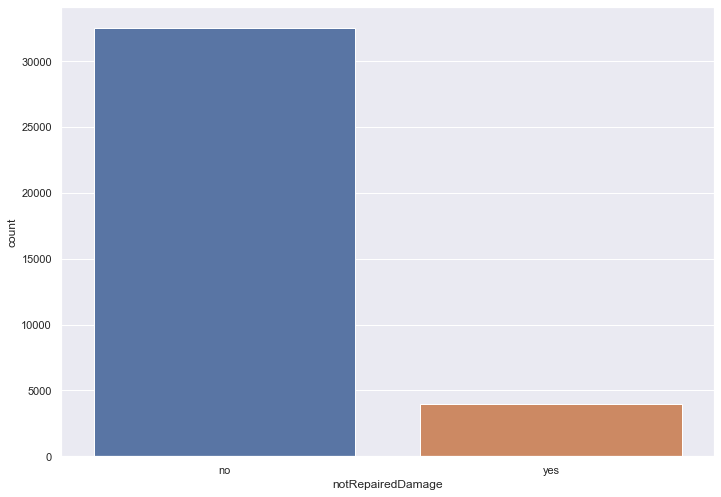

In [62]:
sns.countplot(x = 'notRepairedDamage', data= cars_data)

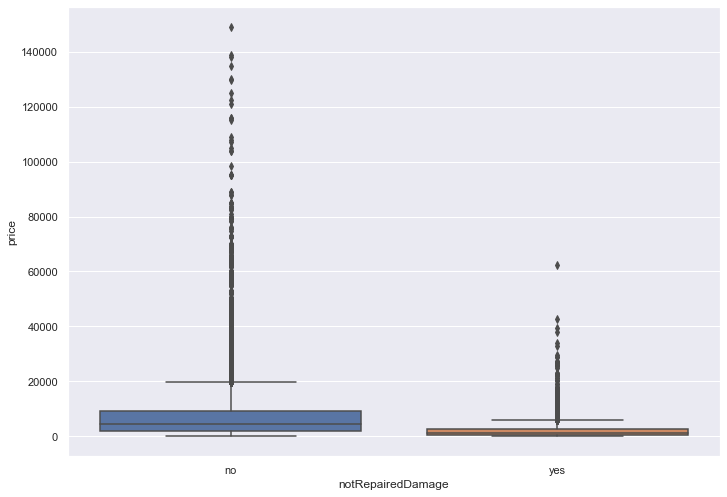

In [63]:
sns.boxplot(x = 'notRepairedDamage', y = 'price', data = cars_data)

### notRepairedDamage is significant

## Dropping insignificant features

In [64]:
col = ['seller', 'offerType', 'abtest']
cars_data = cars_data.drop(columns=col, axis = 1)

In [65]:
cars_data.head()

,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,Age
0,4450,limousine,manual,150,3er,150000,diesel,bmw,NaN,15.250
1,13299,suv,manual,163,xc_reihe,150000,diesel,volvo,no,13.500
2,3200,bus,manual,101,touran,150000,diesel,volkswagen,NaN,15.920
3,4500,small car,manual,86,ibiza,60000,petrol,seat,no,13.000
4,18750,suv,automatic,185,xc_reihe,150000,diesel,volvo,no,10.920


In [66]:
cars_data.isnull().sum()

price                   0
vehicleType          2876
gearbox               794
powerPS                 0
model                1683
kilometer               0
fuelType             2597
brand                   0
notRepairedDamage    6277
Age                     0
dtype: int64

## Correlation

In [67]:
cars_select = cars_data.select_dtypes(exclude=[object])
correlation = cars_select.corr()
round(correlation, 3)

,price,powerPS,kilometer,Age
price,1.000,0.575,-0.440,-0.336
powerPS,0.575,1.000,-0.016,-0.151
kilometer,-0.440,-0.016,1.000,0.292
Age,-0.336,-0.151,0.292,1.000


## Model Building

### Different models to be built:
* Linear Regression
* Random Forest

### Different dataset types to be used:
* Dropping rows with missing values
* Imputing rows with missing values

In [68]:
cars_data_omit = cars_data.dropna(axis=0)
cars_data_omit.head()

,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,Age
1,13299,suv,manual,163,xc_reihe,150000,diesel,volvo,no,13.500
3,4500,small car,manual,86,ibiza,60000,petrol,seat,no,13.000
4,18750,suv,automatic,185,xc_reihe,150000,diesel,volvo,no,10.920
5,988,limousine,manual,90,passat,150000,petrol,volkswagen,no,23.170
7,1399,coupe,manual,136,clk,150000,petrol,mercedes_benz,no,21.920


In [69]:
cars_data_omit = pd.get_dummies(cars_data_omit, drop_first= True)
cars_data_omit.head()

,price,powerPS,kilometer,Age,vehicleType_cabrio,vehicleType_coupe,vehicleType_limousine,vehicleType_others,vehicleType_small car,vehicleType_station wagon,...,brand_seat,brand_skoda,brand_smart,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,notRepairedDamage_yes
1,13299,163,150000,13.500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,4500,86,60000,13.000,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,18750,185,150000,10.920,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,988,90,150000,23.170,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,1399,136,150000,21.920,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Importing necessary libraries

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

## Model Building with omitted data

### Seperating input and output

In [71]:
x1 = cars_data_omit.drop(['price'], axis='columns', inplace = False)
y1 = cars_data_omit['price']

## Feature scaling of price

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D3F3E1AC88>,
      dtype=object)

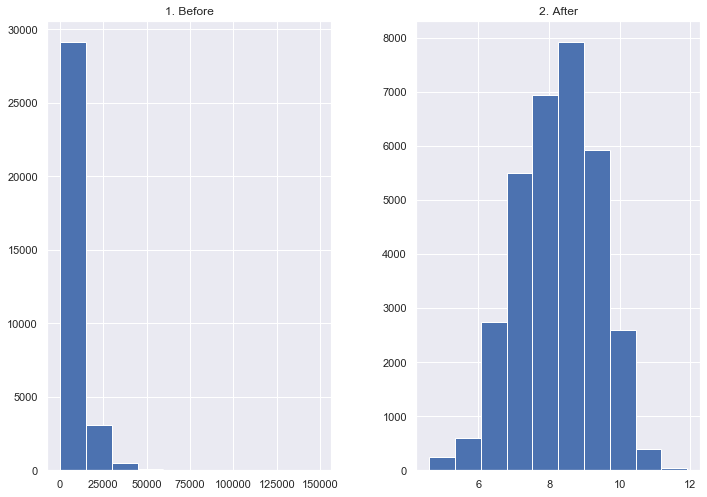

In [72]:
prices = pd.DataFrame({"1. Before": y1, "2. After": np.log(y1)})
prices.hist()

In [73]:
y1 = np.log(y1)

### Splitting data into test and train

In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(x1, y1, test_size = 0.3, random_state = 3)

In [75]:
base_pred = np.mean(Y_test)
base_pred

8.249615787653337

### Finding mean for test data

In [76]:
base_pred = np.repeat(base_pred, len(Y_test))

In [77]:
base_pred

array([8.24961579, 8.24961579, 8.24961579, ..., 8.24961579, 8.24961579,
       8.24961579])

### Finding RMSE

In [78]:
base_root_mean_sqr_error_omit = np.sqrt(mean_squared_error(Y_test, base_pred))

In [79]:
base_root_mean_sqr_error_omit

1.1274483657478247

## Linear regression with omitted data

In [80]:
lgr = LinearRegression(fit_intercept= True)
model_lin_omit = lgr.fit(X_train, Y_train)

In [81]:
cars_pred_omit = lgr.predict(X_test)

In [82]:
model_lin_omit_mse1 = mean_squared_error(Y_test, cars_pred_omit)
model_lin_omit_rmse1 = np.sqrt(model_lin_omit_mse1)

In [83]:
model_lin_omit_rmse1

0.5455481266513853

In [84]:
r2_model_lin_omit_test = model_lin_omit.score(X_test, Y_test)
r2_model_lin_omit_train = model_lin_omit.score(X_train, Y_train)

In [85]:
print(r2_model_lin_omit_test, r2_model_lin_omit_train)

0.7658615091649235 0.7800936978183916


## Residual Plot

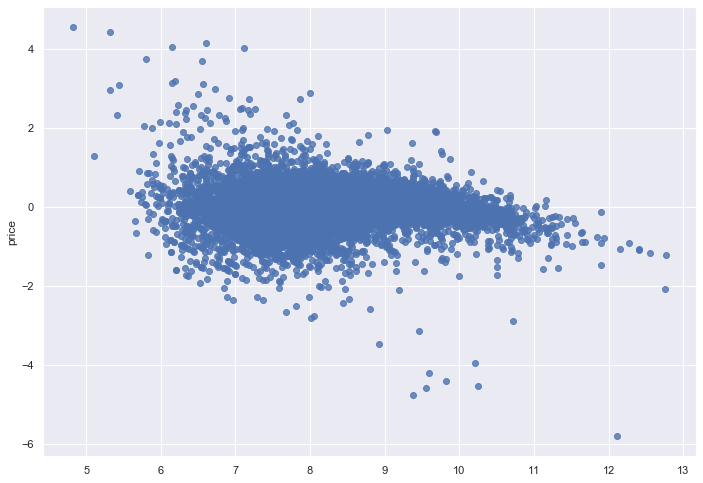

In [86]:
residual_lin_omit = Y_test - cars_pred_omit
sns.regplot(x = cars_pred_omit, y = residual_lin_omit, scatter = True, fit_reg=False, data = cars_data_omit)

In [87]:
residual_lin_omit.describe()

count   9866.000
mean       0.003
std        0.546
min       -5.796
25%       -0.261
50%        0.041
75%        0.302
max        4.547
Name: price, dtype: float64

## Random Forests with Omitted data

In [88]:
rf = RandomForestRegressor(n_estimators= 100, max_features= 'auto', max_depth= 100, min_samples_split=10, min_samples_leaf= 4, random_state= 1)

In [89]:
model_rf_omit = rf.fit(X_train, Y_train)

In [90]:
cars_rf_pred_omit = model_rf_omit.predict(X_test)

### Computing MSE and RMSE

In [91]:
model_rf_omit_mse1 = mean_squared_error(Y_test, cars_rf_pred_omit)
model_rf_omit_rmse1 = np.sqrt(model_rf_omit_mse1)
model_rf_omit_rmse1

0.4360736289370223

In [92]:
r2_model_rf_omit_test = model_rf_omit.score(X_test, Y_test)
r2_model_rf_omit_train = model_rf_omit.score(X_train, Y_train)

In [93]:
print(r2_model_rf_omit_test, r2_model_rf_omit_train)

0.8504018147750623 0.9202494705146291


## Model Building with imputed data

In [94]:
cars_imputed = cars_data.apply(lambda x:x.fillna(x.median())\
                              if x.dtype == 'float' else \
                              x.fillna(x.value_counts().index[0]))
cars_imputed.isnull().sum()

price                0
vehicleType          0
gearbox              0
powerPS              0
model                0
kilometer            0
fuelType             0
brand                0
notRepairedDamage    0
Age                  0
dtype: int64

In [95]:
cars_imputed.head()

,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,Age
0,4450,limousine,manual,150,3er,150000,diesel,bmw,no,15.250
1,13299,suv,manual,163,xc_reihe,150000,diesel,volvo,no,13.500
2,3200,bus,manual,101,touran,150000,diesel,volkswagen,no,15.920
3,4500,small car,manual,86,ibiza,60000,petrol,seat,no,13.000
4,18750,suv,automatic,185,xc_reihe,150000,diesel,volvo,no,10.920


In [96]:
cars_imputed = pd.get_dummies(cars_imputed, drop_first= True)

In [97]:
x2 = cars_imputed.drop(['price'], axis='columns', inplace = False)
y2 = cars_imputed['price']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D3F4893390>,
      dtype=object)

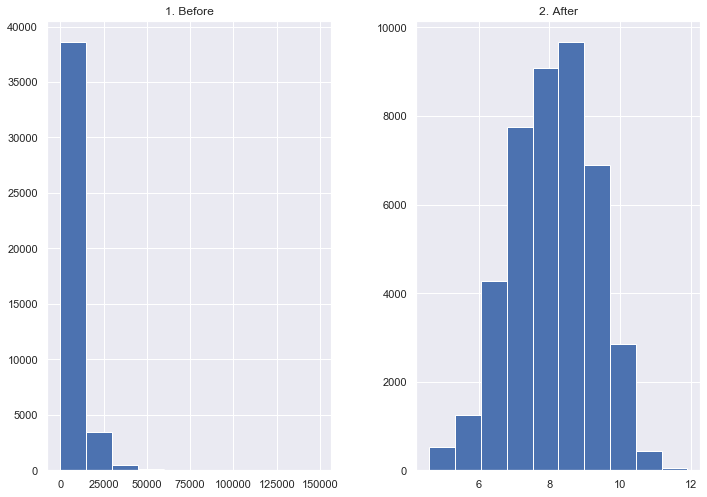

In [98]:
prices = pd.DataFrame({"1. Before": y2, "2. After": np.log(y2)})
prices.hist()

In [99]:
y2 = np.log(y2)

In [100]:
X_train, X_test, Y_train, Y_test = train_test_split(x2, y2, test_size = 0.3, random_state = 3)

In [101]:
base_pred = np.mean(Y_test)
base_pred

8.068391740519193

In [102]:
base_pred = np.repeat(base_pred, len(Y_test))

In [103]:
base_root_mean_sqr_error_imp = np.sqrt(mean_squared_error(Y_test, base_pred))

In [104]:
base_root_mean_sqr_error_imp

1.1884349112889792

In [105]:
lgr2 = LinearRegression(fit_intercept= True)
model_lin_imputed = lgr2.fit(X_train, Y_train)
cars_pred_imputed = model_lin_imputed.predict(X_test)

In [106]:
model_lin_imp_mse1 = mean_squared_error(Y_test, cars_pred_imputed)
model_lin_imp_rmse1 = np.sqrt(model_lin_imp_mse1)
model_lin_imp_rmse1

0.6483956449231295

In [107]:
r2_model_lin_imp_test = model_lin_imputed.score(X_test, Y_test)
r2_model_lin_imp_train = model_lin_imputed.score(X_train, Y_train)

In [108]:
print(r2_model_lin_imp_test, r2_model_lin_imp_train)

0.7023339008631185 0.7071658736894363


In [109]:
rf2 = RandomForestRegressor(n_estimators= 100, max_features= 'auto', max_depth= 100, min_samples_split=10, min_samples_leaf= 4, random_state= 1)

In [110]:
model_rf_imp = rf.fit(X_train, Y_train)

In [111]:
cars_rf_pred_imp = model_rf_imp.predict(X_test)

In [112]:
model_rf_imp_mse1 = mean_squared_error(Y_test, cars_rf_pred_imp)
model_rf_imp_rmse1 = np.sqrt(model_rf_imp_mse1)
model_rf_imp_rmse1

0.494313994408829

In [113]:
r2_model_rf_imp_test = model_rf_imp.score(X_test, Y_test)
r2_model_rf_imp_train = model_rf_imp.score(X_train, Y_train)

In [114]:
print(r2_model_rf_imp_test, r2_model_rf_imp_train)

0.8269964521311131 0.9024289431669166


# Conclusion

In [115]:
print(
f"""
Metrics for models built from data where missing values are ommited:
R Squared Value for train from Linear Regression = {r2_model_lin_omit_train}
R Squared Value for test from Linear Regression = {r2_model_lin_omit_test}
R Squared Value for train from Random Forests = {r2_model_rf_omit_train}
R Squared Value for test from Random Forests = {r2_model_rf_omit_test}
Base RMSE of model built = {base_root_mean_sqr_error_omit}
Base RMSE for test  from Linear Regression = {model_lin_omit_rmse1}
Base RMSE for test from Random Forests = {model_rf_omit_rmse1}


Metrics for models built from data where missing values are imputed:
R Squared Value for train from Linear Regression = {r2_model_lin_imp_train}
R Squared Value for test from Linear Regression = {r2_model_lin_imp_test}
R Squared Value for train from Random Forests = {r2_model_rf_imp_train}
R Squared Value for test from Random Forests = {r2_model_rf_imp_test}
Base RMSE of model built = {base_root_mean_sqr_error_imp}
Base RMSE for test  from Linear Regression = {model_lin_imp_rmse1}
Base RMSE for test from Random Forests = {model_rf_imp_rmse1}
""")


Metrics for models built from data where missing values are ommited:
R Squared Value for train from Linear Regression = 0.7800936978183916
R Squared Value for test from Linear Regression = 0.7658615091649235
R Squared Value for train from Random Forests = 0.9202494705146291
R Squared Value for test from Random Forests = 0.8504018147750623
Base RMSE of model built = 1.1274483657478247
Base RMSE for test  from Linear Regression = 0.5455481266513853
Base RMSE for test from Random Forests = 0.4360736289370223


Metrics for models built from data where missing values are imputed:
R Squared Value for train from Linear Regression = 0.7071658736894363
R Squared Value for test from Linear Regression = 0.7023339008631185
R Squared Value for train from Random Forests = 0.9024289431669166
R Squared Value for test from Random Forests = 0.8269964521311131
Base RMSE of model built = 1.1884349112889792
Base RMSE for test  from Linear Regression = 0.6483956449231295
Base RMSE for test from Random Fore

Hence **Random Forests** model with *omitted data* performs better than the other combinations.

## Saving model to a File

In [116]:
import joblib
joblib.dump(model_rf_omit, "rf_cars.joblib")

['rf_cars.joblib']